## 데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv('data.csv')
df.head()

,X1,X2
0,2.228989,6.248391
1,0.900522,-7.106919
2,-6.960200,6.466237
3,-5.699553,5.036793
4,5.824680,-9.422138


## 그려보기

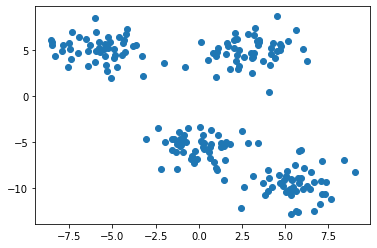

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['X1'],df['X2'])

## SKlearn으로 학습하기

In [3]:
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=4)

In [4]:
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
kmean.predict(df)

array([1, 0, 3, 3, 2, 0, 3, 1, 3, 3, 0, 2, 1, 0, 0, 3, 3, 1, 1, 2, 1, 2,
       3, 3, 0, 2, 1, 3, 0, 2, 0, 0, 0, 0, 2, 3, 1, 2, 0, 2, 3, 2, 2, 3,
       2, 0, 1, 3, 1, 1, 0, 0, 1, 1, 2, 3, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1,
       2, 1, 3, 1, 0, 3, 1, 1, 1, 1, 1, 3, 2, 3, 0, 3, 0, 3, 3, 1, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 0, 3, 0, 3, 0, 1, 0, 2, 0, 2, 3,
       1, 0, 3, 3, 0, 2, 2, 2, 3, 1, 1, 2, 1, 0, 2, 0, 3, 3, 2, 3, 2, 1,
       2, 0, 1, 0, 2, 3, 0, 1, 1, 0, 3, 3, 2, 3, 2, 0, 1, 2, 3, 3, 2, 2,
       1, 3, 0, 1, 2, 2, 2, 2, 2, 3, 0, 1, 1, 0, 3, 0, 2, 0, 3, 1, 1, 2,
       1, 0, 0, 1, 3, 1, 1, 3, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 3, 0, 2, 2,
       1, 2])

In [6]:
cluster=kmean.predict(df)

## 결과 확인해보기

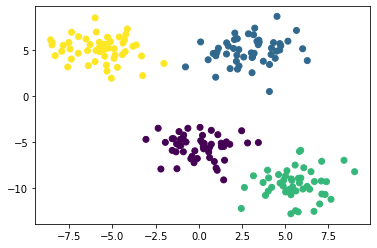

In [7]:
plt.scatter(df['X1'],df['X2'],c=cluster)

## Centroid 포함 결과확인

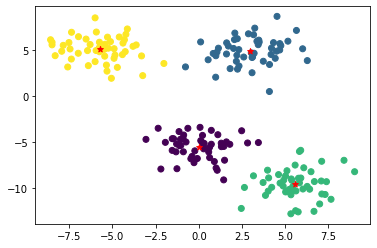

In [8]:
plt.scatter(df['X1'],df['X2'],c=cluster)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='*',c='r')

* cluster 갯수를 바꾸어가며 그림 그려보자

## 최적의 cluster 갯수 구하기

In [9]:
kmean.inertia_

804.1035999398755

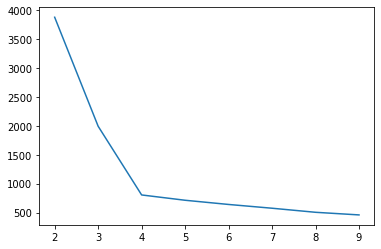

In [10]:
result=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    result.append(kmeans.inertia_)

plt.plot(range(2,10),result)

## Hierarchical Clustering

## dendrogram 그리기

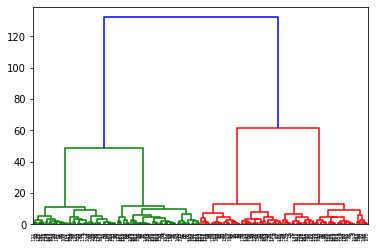

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(df, method='ward')
dendrogram(Z)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [13]:
hierarchical.fit_predict(df)

array([2, 3, 0, 0, 1, 3, 0, 2, 0, 0, 3, 1, 2, 3, 3, 0, 0, 2, 2, 1, 2, 1,
       0, 0, 3, 1, 2, 0, 3, 1, 3, 3, 3, 3, 1, 0, 2, 1, 3, 1, 0, 1, 1, 0,
       1, 3, 2, 0, 2, 2, 3, 3, 2, 2, 1, 0, 1, 3, 3, 3, 2, 3, 1, 2, 1, 2,
       1, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 0, 1, 0, 3, 0, 3, 0, 0, 2, 2, 1,
       3, 1, 1, 2, 3, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0, 3, 2, 3, 1, 3, 1, 0,
       2, 3, 0, 0, 3, 1, 1, 1, 0, 2, 2, 1, 2, 3, 1, 3, 0, 0, 1, 0, 1, 2,
       1, 3, 2, 3, 1, 0, 3, 2, 2, 3, 0, 0, 1, 0, 1, 3, 2, 1, 0, 0, 1, 1,
       2, 0, 3, 2, 1, 1, 1, 1, 1, 0, 3, 2, 2, 3, 0, 3, 1, 3, 0, 2, 2, 1,
       2, 3, 3, 2, 0, 0, 2, 0, 0, 0, 1, 3, 2, 3, 0, 3, 1, 0, 0, 3, 1, 1,
       2, 1], dtype=int64)

In [14]:
cluster=hierarchical.fit_predict(df)

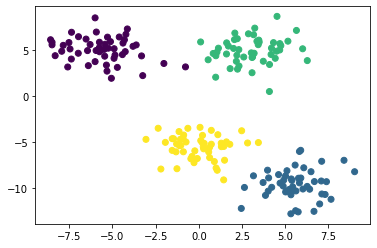

In [15]:
plt.scatter(df['X1'],df['X2'],c=cluster)

## 과제

* airline passenger data 클러스터링
* 분류된 데이터를 보고 의미 살펴보기